# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("/Users/oluwadamilolapopoola/Documents/GitHub/BritishAirlineForage/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [31]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

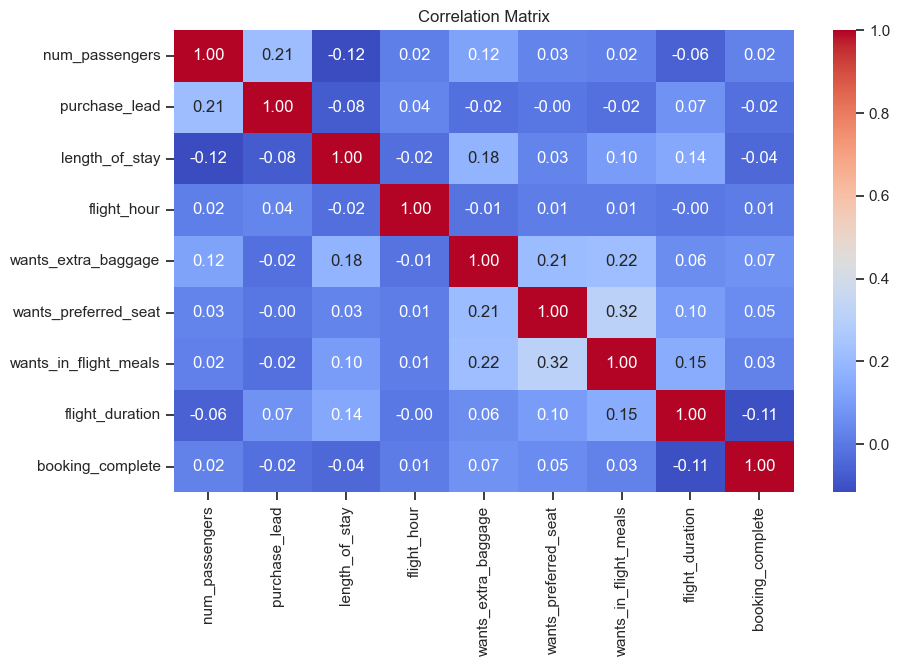

In [75]:
# Create a heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Scatterplot matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
sns.pairplot(df)
plt.show()

In [77]:
import pandas as pd

# Assume your DataFrame is named 'data'
# List of categorical columns for one-hot encoding. This splits the variable into every instance available eg sales_channel_Internet
categorical_columns = ['sales_channel', 'trip_type', 'flight_day'] #This is important for me because i want to see what day, trip type and medium used to book flights. 


# Apply one-hot encoding to the categorical columns
encoded_data = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame
print(encoded_data.head())

#num_passengers, purchase_lead, length_of_stay, flight_hour, 
#wants_extra_baggage, wants_preferred_seat, #wants_in_flight_meals, flight_duration, 
#sales_channel_Internet, sales_channel_Mobile, trip_type_CircleTrip, 
#trip_type_OneWay, trip_type_RoundTrip, flight_day_Fri, flight_day_Mon, 
#flight_day_Sat, flight_day_Sun, flight_day_Thu, flight_day_Tue, 
#flight_day_Wed

#Fields i could not use below
#route,booking_origin

   num_passengers  purchase_lead  length_of_stay  flight_hour   route  \
0               2            262              19            7  AKLDEL   
1               1            112              20            3  AKLDEL   
2               2            243              22           17  AKLDEL   
3               1             96              31            4  AKLDEL   
4               2             68              22           15  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                    1                     0   
1    New Zealand                    0                     0   
2          India                    1                     1   
3    New Zealand                    0                     0   
4          India                    1                     0   

   wants_in_flight_meals  flight_duration  ...  trip_type_CircleTrip  \
0                      0             5.52  ...                     0   
1                      0             5

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = encoded_data[['num_passengers','purchase_lead','length_of_stay','flight_hour','wants_extra_baggage', 
                  'wants_preferred_seat', 'wants_in_flight_meals','flight_duration', 'sales_channel_Internet', 
                  'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip', 
                  'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu',
                  'flight_day_Tue', 'flight_day_Wed']]
y = encoded_data['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('')
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)


Accuracy: 0.85
Precision: 0.4439252336448598
Recall: 0.06418918918918919
F1-Score: 0.11216056670602126

Feature Importances: [0.05820589 0.28470047 0.17087614 0.19776096 0.01394905 0.01555143
 0.02454234 0.12915398 0.00410227 0.00406146 0.00043118 0.0009185
 0.00132079 0.01320321 0.01420361 0.01269693 0.01272024 0.01409456
 0.01401011 0.01349689]


Accuracy: 0.85.
The accuracy is a common evaluation metric for classification models. It represents the proportion of correctly predicted instances (or samples) in the test dataset. In this case, an accuracy of 0.85 (or 85%) indicates that approximately 85% of the samples in the test set were correctly classified by the model.


Feature Importances: 0.05820589 0.28470047 0.17087614 0.19776096 0.01394905 0.01555143 0.02454234 0.12915398 0.00410227 0.00406146 0.00043118 0.0009185 0.00132079 0.01320321 0.01420361 0.01269693 0.01272024 0.01409456 0.01401011 0.01349689. 
This indicates the importance of each feature in making predictions with the trained model. In a Random Forest classifier, feature importances reflect how much each feature contributes to the model's decision-making process. The values in the list correspond to the importance scores of the features I used: 'num_passengers','purchase_lead','length_of_stay','flight_hour','wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals','flight_duration', 'sales_channel_Internet','sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip', 'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed'. 

In [82]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.44      0.06      0.11      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.53      0.52     10000
weighted avg       0.80      0.85      0.80     10000



In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Instantiate your model (replace with the appropriate model)
model = RandomForestClassifier()

# Define the number of folds for cross-validation
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the model on the entire dataset
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
print('')

# Generate a classification report for the entire dataset. The 1 
#means that the model's predictions are entirely correct for all instances in the dataset
classification_rep = classification_report(y, y_pred)
print("Classification Report:\n", classification_rep)

Cross-Validation Scores: [0.8475 0.8478 0.841  0.8486 0.8528]
Mean Accuracy: 0.8475400000000001

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42522
           1       1.00      1.00      1.00      7478

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



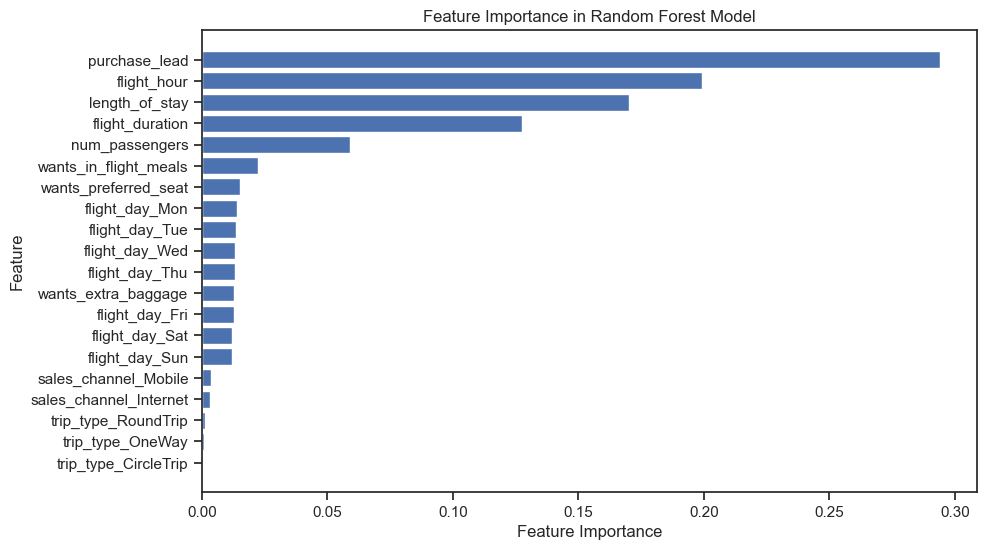

In [73]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()